In [10]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
print(np.shape(train_images), np.shape(train_labels))

(60000, 28, 28) (60000,)


In [13]:
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boot'
]

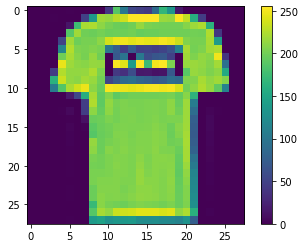

In [14]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

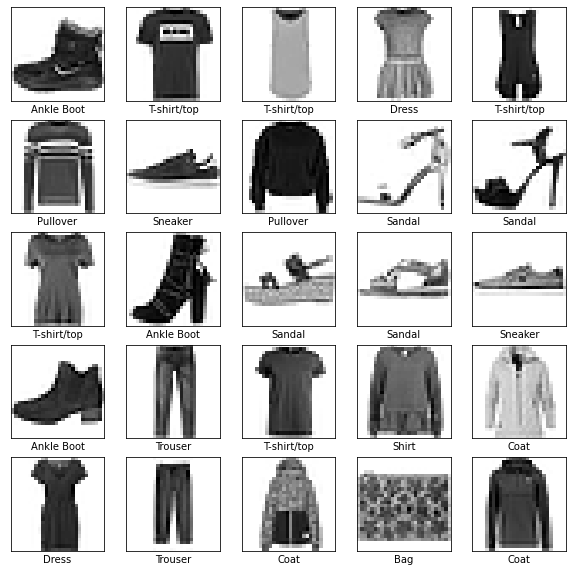

In [16]:
#verify the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    # keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, steps_per_epoch=400, validation_data=(test_images, test_labels), validation_steps = 50)

Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 0.5741 - accuracy: 0.8036 - val_loss: 0.4732 - val_accuracy: 0.8333
Epoch 2/10
400/400 [==============================] - 1s 4ms/step - loss: 0.4243 - accuracy: 0.8506 - val_loss: 0.4385 - val_accuracy: 0.8475
Epoch 3/10
400/400 [==============================] - 1s 4ms/step - loss: 0.3798 - accuracy: 0.8658 - val_loss: 0.4007 - val_accuracy: 0.8628
Epoch 4/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3559 - accuracy: 0.8715 - val_loss: 0.3900 - val_accuracy: 0.8605
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8785 - val_loss: 0.3944 - val_accuracy: 0.8597
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3227 - accuracy: 0.8843 - val_loss: 0.3722 - val_accuracy: 0.8680
Epoch 7/10
400/400 [==============================] - 1s 4ms/step - loss: 0.3072 - accuracy: 0.8877 - val_loss: 0.3732 - val_accuracy: 0.8672
Epoch 

In [98]:
# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.3961 - accuracy: 0.8925

Test accuracy: 0.8924999833106995


In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
predicitons = probability_model.predict(test_images)

In [22]:
predicitons[0]

array([8.0878635e-06, 9.7675823e-08, 1.7225599e-05, 1.0660215e-06,
       2.8314402e-05, 4.8715211e-02, 4.3267130e-05, 1.5931796e-02,
       3.6119873e-04, 9.3489373e-01], dtype=float32)

In [23]:
np.argmax(predicitons[0]), test_labels[0]

(9, 9)

In [61]:
def plot_image(i, predictions_array, true_label, img, test=True):
    if test==True:
        true_label, img = true_label[i], img
    else:
        true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(predictions_array)
    if test==True:
        plt.xlabel(predicted_label)
    else:
        if(predicted_label==true_label):
            color = 'blue'
        else:
            color='red'
        plt.xlabel("{} {:2.0f}% ({})".format(
            class_names[predicted_label], 
            100*np.max(predictions_array), 
            class_names[true_label]), 
            color=color
        )

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

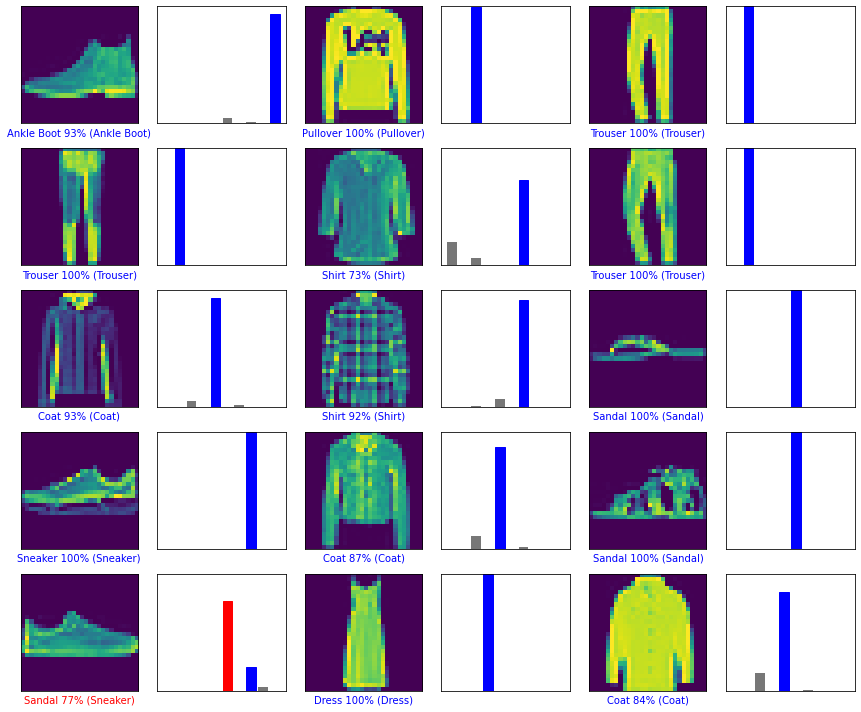

In [62]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predicitons[i], test_labels, test_images, False)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predicitons[i], test_labels)
plt.tight_layout()
plt.show()

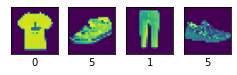

In [63]:
#use some random images for prediction
root = 'C:\\Users\\Admin\\Desktop\\WORK\\Deep Learning\\Deep-Learning\\Classify Images Of Clothing\\testing_images'
i=1
plt.figure(figsize=(5,5))
for sample in os.listdir(root):
    img_path = root + '\\' + sample
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (28,28))
    img = (255-img)/255
    image = img
    img = img.reshape(-1, 28, 28)
    test_predicitons = model.predict(img, batch_size=1)
    plt.subplot(5,5,i)
    plot_image(i,test_predicitons[0],test_images,image)
    i=i+1